# Trees in Camden
Use this notebook to complete your analysis.
Enter code and comments after the TODOs.

There are some code cells completed for you.  These are highlighted with a <font style="color:crimson;background-color:lemonchiffon">TODO</font> comment.  You can use these to guide the subsequent tasks.  Other cells require you to read documentation or search for answers.  The markdown comments give you links to some useful documentation and articles.  Read the documentation, look at the examples provided in the documentation and then try to apply them to your data.

Remember that you can find information on the pandas functions on the Pandas website https://pandas.pydata.org/pandas-docs/stable/reference/frame.html or directly in the notebook by puttin a ? before or after the function name. for instance: `?df.head()` or `df['Maturity'].value_counts()?`

## Imports
Import the libraries we need to perform the analysis.

In [1]:
import pandas as pd

## Task 2: Load Data and Perform Initial Exploration
Load the data from the supplied data files.  The files are in different **file formats**, but Pandas can handle this.

You should read the data in using the appropriate function:

- [pandas.read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
- [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
- [pandas.read_json](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_json.html)

You can then inspect the first few rows of the loaded dataframe:

[pandas.DataFrame.head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

You can get the number of rows and columns:

[pandas.DataFrame.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)

You can get the list of column names:

[pandas.DataFrame.columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)

And you can list the data types of the columns:

[pandas.DataFrames.dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)

I've done the first one (loading `"camden_trees.xlsx"`) for you.  Please load `"camden_trees_environmental.csv"` and `"tree_common_names.json"` and analyse them in the same way.


### 2.1 Trees
The file `"camden_trees.xlsx"` is an Excel file, so we use the `read_excel()` function.

In [2]:
# Create a Pandas dataframe called trees that contains the contents of the Excel file
trees = pd.read_excel("camden_trees.xlsx")

In [3]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23444 entries, 0 to 23443
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Identifier                                23444 non-null  object        
 1   Number Of Trees                           23422 non-null  float64       
 2   Site Name                                 23444 non-null  object        
 3   Contract Area                             23444 non-null  object        
 4   Scientific Name                           23444 non-null  object        
 5   Inspection Date                           23043 non-null  datetime64[ns]
 6   Inspection Due Date                       23043 non-null  object        
 7   Height In Metres                          23006 non-null  float64       
 8   Spread In Metres                          23006 non-null  float64       
 9   Diameter In Centimetres At B

We can now inspect the first few rows using `head()`.  By default, `head()` displays the first 5 rows.

In [4]:
# Display the first few rows
trees.head()

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
0,00060053,1.0,Russell Nurseries Estate,Housing,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000135,Hampstead Town,527305,185240,-0.165240,51.551693,"(51.551693, -0.16524)"
1,00057855,1.0,BRECKNOCK JMI (E),Education,Vacant Tree Pit,2019-07-17,2022/2023,NaN,NaN,NaN,E05000131,Cantelowes,529923,184782,-0.127681,51.546984,"(51.546984, -0.127681)"
2,00059953,1.0,Estate 51 Ravenshaw Street,Housing,Ficus carica,NaT,NaN,5.0,4.0,10.0,NaN,NaN,0,0,NaN,NaN,NaN
3,00059915,1.0,ROSARY RC JMI (E),Education,Betula jacquemontii,NaT,NaN,4.0,1.0,6.0,E05000135,Hampstead Town,527249,185261,-0.166051,51.551901,"(51.551901, -0.166051)"
4,00010762,1.0,Holly Lodge Estate,Housing,Ilex x altaclarensis,2017-06-14,2020/2021,14.0,6.0,26.0,E05000137,Highgate,528414,186770,-0.148704,51.565198,"(51.565198, -0.148704)"


It's good to understand the size of the dataset we are dealing with.  The `shape` property does this for us.

In [5]:
# Get the number of rows and columns
trees.shape

(23444, 17)

If there are lots of columns we can't always see all of them in the `head()` list above.  We can use the `columns` property to get a full list:

In [6]:
# Get a list of all the columns in the dataframe
trees.columns

Index(['Identifier', 'Number Of Trees', 'Site Name', 'Contract Area',
       'Scientific Name', 'Inspection Date', 'Inspection Due Date',
       'Height In Metres', 'Spread In Metres',
       'Diameter In Centimetres At Breast Height', 'Ward Code', 'Ward Name',
       'Easting', 'Northing', 'Longitude', 'Latitude', 'Location'],
      dtype='object')

In order to process the data properly, we should understand the data type for each column.  Pandas attempts to work this out for us, but sometimes we need to give it a bit of a hand.  We can use the `dtypes` property to list the data types.  Note that `object` is Pandas way of saying `string`, i.e. a text data type.

In [7]:
# List the data types of each column
trees.dtypes

Identifier                                          object
Number Of Trees                                    float64
Site Name                                           object
Contract Area                                       object
Scientific Name                                     object
Inspection Date                             datetime64[ns]
Inspection Due Date                                 object
Height In Metres                                   float64
Spread In Metres                                   float64
Diameter In Centimetres At Breast Height           float64
Ward Code                                           object
Ward Name                                           object
Easting                                              int64
Northing                                             int64
Longitude                                          float64
Latitude                                           float64
Location                                            obje

### 2.2 Environmental
The file `"camden_trees_environmental.csv"` is a csv file.  Use the appropriate function to load it into a Pandas DataFrame.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [8]:
# Create a Pandas dataframe called environmental that contains the contents of the csv file
# TODO
environmental = pd.read_csv("camden_trees_environmental.csv")

In [9]:
environmental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23415 entries, 0 to 23414
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Identifier                                        23415 non-null  object 
 1   Maturity                                          23006 non-null  object 
 2   Physiological Condition                           22943 non-null  object 
 3   Tree Set To Be Removed                            23415 non-null  object 
 4   Removal Reason                                    84 non-null     object 
 5   Capital Asset Value For Amenity Trees             22982 non-null  float64
 6   Carbon Storage In Kilograms                       20555 non-null  float64
 7   Gross Carbon Sequestration Per Year In Kilograms  20555 non-null  float64
 8   Pollution Removal Per Year In Grams               20555 non-null  float64
dtypes: float64(4), obj

In [10]:
# Display the first few rows
# TODO
environmental.head()

,Identifier,Maturity,Physiological Condition,Tree Set To Be Removed,Removal Reason,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams
0,00055125,Juvenile,Good,No,NaN,115.07,1.6,0.5,5.7
1,00059429,Middle aged,Fair,No,NaN,7518.08,NaN,NaN,NaN
2,00018254,Mature,Fair,No,NaN,20419.63,426.4,8.8,215.2
3,00027155,Mature,Fair,No,NaN,21447.74,448.3,9.6,379.1
4,00041326,Juvenile,Good,No,NaN,524.30,9.9,1.4,12.8


In [11]:
# Get the number of rows and columns
# TODO
environmental.shape

(23415, 9)

In [12]:
# Get a list of all the columns in the dataframe
# TODO
environmental.columns

Index(['Identifier', 'Maturity', 'Physiological Condition',
       'Tree Set To Be Removed', 'Removal Reason',
       'Capital Asset Value For Amenity Trees', 'Carbon Storage In Kilograms',
       'Gross Carbon Sequestration Per Year In Kilograms',
       'Pollution Removal Per Year In Grams'],
      dtype='object')

In [13]:
# List the data types of each column
# TODO
environmental.dtypes

Identifier                                           object
Maturity                                             object
Physiological Condition                              object
Tree Set To Be Removed                               object
Removal Reason                                       object
Capital Asset Value For Amenity Trees               float64
Carbon Storage In Kilograms                         float64
Gross Carbon Sequestration Per Year In Kilograms    float64
Pollution Removal Per Year In Grams                 float64
dtype: object

<hr/>

### 2.3 Common and Scientific Names
The file `"tree_common_names.json"` is a json file.  Use the appropriate function to load it into a Pandas DataFrame.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [14]:
# Create a Pandas dataframe called names that contains the contents of the json file
# TOsDO
names = pd.read_json("tree_common_names.json")

In [15]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Scientific Name  589 non-null    object
 1   Common Name      565 non-null    object
dtypes: object(2)
memory usage: 9.3+ KB


In [16]:
# Display the first few rows
# TODO
names.head()

,Scientific Name,Common Name
0,Carpinus betulus Lucas,Hornbeam - European
1,Prunus 'Pandora',Cherry - Ornamental
2,Tilia unidentified species,Lime
3,Rosa unidentified species,None
4,Cedrus libani,Cedar of Lebanon


In [17]:
# Get the number of rows and columns
# TODO
names.shape

(589, 2)

In [18]:
# Get a list of all the columns in the dataframe
# TODO
names.columns

Index(['Scientific Name', 'Common Name'], dtype='object')

In [19]:
# List the data types of each column
# TODO
names.dtypes

Scientific Name    object
Common Name        object
dtype: object

<hr/>

### 2.4 Review
At the end of this task you should have a good basic understanding of the contents and overall shape of the different data files.  If you don't, do back and review the outputs above.

## Task 3: Further Inspect the Datasets
The initial inspection gave you a very high-level understanding of the data.  We will now drill a bit deeper and try to understand the data column-by-column.

For columns with a string data type (`object` in Pandas) we have **qualitative** data.  It would be good to know how many *different* values we have in the column, what those values are and the *count* how many of each different value we have.  This will help us understand if the qualitative variable is **binary**, **nominal** or **ordinal**.

For columns with a numeric data type (`int` or `float`) we have **quantitative** data.  Usually integer type variables can the thought of as **discrete** and float type variables can be thought of as **continuous**.  It would be good to know some summary descriptive statistics for these columns.   

If you are unsure of what these different data classifications mean, read this:

[Types of Variables](https://openclassrooms.com/en/courses/6037301-perform-an-initial-data-analysis/6051886-discover-the-four-variable-types)

You can get the list of values and counts for a column using this function:

[pandas.Series.value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

You can get the descriptive statistics for a DataFrame using this function:

[pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

Note that Pandas may treat integer columns as floats if there are null values in the columns.  So if you see a float data type it might be worth checking the actual values to confirm if it really is a float or if it really is an int with nulls.  You can check the actual values with:

[pandas.Series.unique](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html)



### 3.1 Further Inspect the Trees Dataset
Let's start with the trees dataset.


#### 3.1.a Counts of Values for String Types Columns
Go through each column that is a string (object) type and count the number of rows for each value in the column.  After each one, classify the data as binary, nominal or ordinal using a markdown comment.

I've done the first one for you.


**Site Name**

In [20]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23444 entries, 0 to 23443
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Identifier                                23444 non-null  object        
 1   Number Of Trees                           23422 non-null  float64       
 2   Site Name                                 23444 non-null  object        
 3   Contract Area                             23444 non-null  object        
 4   Scientific Name                           23444 non-null  object        
 5   Inspection Date                           23043 non-null  datetime64[ns]
 6   Inspection Due Date                       23043 non-null  object        
 7   Height In Metres                          23006 non-null  float64       
 8   Spread In Metres                          23006 non-null  float64       
 9   Diameter In Centimetres At B

In [28]:
# List of values in Site Name column and their counts
trees["Site Name"].value_counts()

WATERLOW PARK (LS)                         920
Alexandra & Ainsworth Estate               289
Belsize nature reserve, Russell Nursery    278
Holly Lodge Estate                         272
LINCOLN'S INN FIELDS, GARDENS (LS)         193
                                          ... 
GOLDINGTON CRESCENT                          1
ALLCROFT ROAD                                1
WOBURN WALK, LAND BEHIND 4-18                1
KILBURN PRIORY                               1
GOODGE PLACE                                 1
Name: Site Name, Length: 1135, dtype: int64

Site Name is **qualitative nominal**.

Now do the same on the other string columns.  Use `value_counts()` and then classify as binary, ordered or unordered using a markdown comment.  As you do each one, stop and look at the values and counts and think about how the data in the column might be useful for supporting the council's initiatives.  Don't just treat this as a mechanical copy/paste task. The objective is, after all, to get really intimate with the data!

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Use one code cell per column and then add a markdown cell after each one to classify the column as in the above example.  Add as many cells as you need.
    </font></div>

**Identifier**

In [25]:
trees["Identifier"].value_counts()

00000999    2
00060087    2
00022744    2
00032549    2
00022674    2
           ..
00046158    1
00058373    1
00059181    1
00002274    1
00013369    1
Name: Identifier, Length: 23438, dtype: int64

Identifier is **qualitative nominal**.

**Contract Area**

In [26]:
trees["Contract Area"].value_counts()

Highways              10062
Housing                7500
Parks                  4330
Education              1288
Corporate Landlord      264
Name: Contract Area, dtype: int64

Conract Area is **qualitative nominal**.

**Site Name**

In [21]:
trees["Site Name"].value_counts()

WATERLOW PARK (LS)                         920
Alexandra & Ainsworth Estate               289
Belsize nature reserve, Russell Nursery    278
Holly Lodge Estate                         272
LINCOLN'S INN FIELDS, GARDENS (LS)         193
                                          ... 
GOLDINGTON CRESCENT                          1
ALLCROFT ROAD                                1
WOBURN WALK, LAND BEHIND 4-18                1
KILBURN PRIORY                               1
GOODGE PLACE                                 1
Name: Site Name, Length: 1135, dtype: int64

Site Name is **qualitative nominal**.

**Scientific Name**

In [27]:
trees["Scientific Name"].value_counts()

Platanus x hispanica                                 3340
Tilia europaea                                       1468
Acer pseudoplatanus                                   941
Betula pendula                                        765
Fraxinus excelsior                                    754
                                                     ... 
Vacant Tree Pit (planned: Populus tremula)              1
Liriodendron fastigiata                                 1
Sequoia sempervirens                                    1
Sorbus x hybrida                                        1
Vacant Tree Pit (planned: Acer rubrum 'Amstrong')       1
Name: Scientific Name, Length: 543, dtype: int64

Scientific Name is **qualitative Nominal**.

**Inspection Due Date**

In [24]:
trees["Inspection Due Date"].value_counts()

2022/2023    7921
2021/2022    7353
2020/2021    6577
2019/2020    1157
2018/2019      16
2017/2018       5
2016/2017       4
2001/2002       4
2003/2004       2
2006/2007       1
2012/2013       1
2013/2014       1
2011/2012       1
Name: Inspection Due Date, dtype: int64

Inspection Due Date is **qualitative Ordinal**.

**Ward Code**

In [25]:
trees["Ward Code"].value_counts()

E05000137    2799
E05000143    1832
E05000134    1541
E05000140    1540
E05000139    1463
E05000136    1424
E05000135    1340
E05000138    1293
E05000132    1284
E05000131    1231
E05000133    1229
E05000129    1008
E05000142     989
E05000144     978
E05000130     899
E05000145     853
E05000141     824
E05000128     691
Name: Ward Code, dtype: int64

Ward Code is **qualitative Nominal**.

**Location**

In [27]:
trees["Location"].value_counts()

(51.556205, -0.173776)    3
(51.553475, -0.152668)    3
(51.548133, -0.144922)    2
(51.544482, -0.144465)    2
(51.55468, -0.164744)     2
                         ..
(51.525312, -0.128846)    1
(51.540297, -0.181512)    1
(51.556013, -0.211326)    1
(51.55969, -0.182457)     1
(51.552397, -0.173397)    1
Name: Location, Length: 23262, dtype: int64

Location is **qualitative Nominal**.

**Ward Name**

In [26]:
trees["Ward Name"].value_counts()

Highgate                          2799
St Pancras and Somers Town        1832
Gospel Oak                        1541
Kilburn                           1540
Kentish Town                      1463
Haverstock                        1424
Hampstead Town                    1340
Holborn and Covent Garden         1293
Fortune Green                     1284
Cantelowes                        1231
Frognal and Fitzjohns             1229
Bloomsbury                        1008
Regent's Park                      989
Swiss Cottage                      978
Camden Town with Primrose Hill     899
West Hampstead                     853
King's Cross                       824
Belsize                            691
Name: Ward Name, dtype: int64

Ward Name is **qualitative Nominal**.

<hr/>

#### 3.1.b Descriptive Stats for Numeric Type Columns
Use the `describe()` function to get the descriptive stats for the numeric columns.

For each column, classify the column as discrete or continuous (use the data type to guide you, but check any floats to confirm whether they are really floats or just ints with null values.  Use `pandas.Series.unique()` to check this).


<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [29]:
# Get the descriptive stats for the numeric columns
# TODO
trees.describe()

,Number Of Trees,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Easting,Northing,Longitude,Latitude
count,23422.000000,23006.000000,23006.000000,23005.000000,23444.000000,23444.000000,23388.000000,23388.000000
mean,1.100034,10.307029,5.997612,32.595262,526762.518171,184085.188662,-0.155145,51.545115
std,1.288041,6.325293,4.132379,26.149994,25835.857212,9121.059755,0.025058,0.013067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.261719,51.512858
25%,1.000000,5.000000,3.000000,12.000000,526583.750000,183665.000000,-0.175734,51.537472
50%,1.000000,9.000000,5.000000,27.000000,528456.500000,184690.000000,-0.148478,51.546669
75%,1.000000,15.000000,8.000000,46.000000,529369.000000,185481.000000,-0.135978,51.554032
max,67.000000,127.000000,88.000000,228.000000,531514.000000,196188.000000,-0.105858,51.650843


In [30]:
# Remind ourselves of the data types
# TODO
trees.dtypes

Identifier                                          object
Number Of Trees                                    float64
Site Name                                           object
Contract Area                                       object
Scientific Name                                     object
Inspection Date                             datetime64[ns]
Inspection Due Date                                 object
Height In Metres                                   float64
Spread In Metres                                   float64
Diameter In Centimetres At Breast Height           float64
Ward Code                                           object
Ward Name                                           object
Easting                                              int64
Northing                                             int64
Longitude                                          float64
Latitude                                           float64
Location                                            obje

<hr/>

Find out if floats are really floats or ints with nulls.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Use one code cell per column.   Add as many cells as you need.
    </font></div>

In [31]:
trees["Number Of Trees"].unique()

array([ 1.,  2.,  3.,  0., nan,  5.,  6.,  7., 18.,  8., 65.,  4., 10.,
        9., 11., 50., 12., 15., 52., 40., 33., 13., 20., 67., 21., 32.,
       24., 26., 16., 25., 51.])

Number Of Trees are **integer with nulls**.

In [32]:
trees["Height In Metres"].unique()

array([  nan,   5. ,   4. ,  14. ,   9. ,   0. ,   2. ,   2.5,   8. ,
        13. ,  17. ,  10. ,   3. ,  19. ,   7. ,   6. ,   1.8,  15. ,
        12. ,   1.5,  16. ,  20. ,  21. ,  24. ,  25. ,   2.7,  18. ,
        11. ,  26. ,  22. ,   0.5,  16.1,  27. ,  28. ,   2.3,  22.3,
        38. ,  15.5,  29. ,  23. ,  34. ,   3.5,   2.6,   1. ,   5.5,
        22.5,   2.2,  36. ,  31. ,  96. ,  13.6, 127. ,  14.7,   4.5,
        30. ,  35. ,  32. ,   9.4,  11.8,  33. ,  40. ,   2.1,   6.5,
        41. ,  23.1,  37. ,  39. ,  12.5,   7.5,  13.7,  31.6,  23.8,
         0.2,  12.3,  15.7,   6.8,   9.3,   3.8,  24.9,  17.4,   2.8,
         3.2,  13.9,  12.4,  10.2,  10.8,  24.5,  30.4,   9.8,  11.4,
        23.4,   3.7,  11.6,   7.7,   8.3,   3.6,  17.5,  19.5])

Height In Metres are **floats with nulls**.

In [33]:
trees["Spread In Metres"].unique()

array([  nan,  4.  ,  1.  ,  6.  ,  7.  ,  0.  ,  1.5 ,  5.  ,  9.  ,
       10.  ,  3.  ,  2.  , 13.  ,  2.5 , 12.  , 15.  , 14.  ,  8.  ,
       11.  ,  0.6 ,  1.8 , 17.  , 20.  , 18.  , 16.  , 22.  , 19.  ,
        5.5 , 26.  ,  1.4 , 23.  , 21.  , 28.  ,  1.2 ,  0.5 ,  3.5 ,
       24.  ,  1.3 ,  1.6 , 30.  ,  1.7 , 27.  ,  4.2 , 11.02,  0.7 ,
        6.5 ,  4.5 , 31.  , 25.  ,  0.8 ,  0.3 ,  2.2 ,  2.8 ,  1.65,
       29.  , 88.  ])

Spread In Metres are **floats with nulls**.

In [34]:
trees["Diameter In Centimetres At Breast Height"].unique()

array([  nan,  10. ,   6. ,  26. ,  29. ,   5. ,   0. ,   4. ,  12. ,
        59. ,  52. ,  23. ,  50. ,  63. ,  15. ,   3. ,  49. ,  42. ,
        14. ,  19. ,   9. ,  70. ,  32. ,  28. ,  34. ,  20. ,  17. ,
        27. ,  37. ,   8. ,  45. ,  18. , 119. ,   7. ,  38. ,  55. ,
        41. ,  75. ,  31. ,  25. ,  11. ,  30. ,  43. ,  68. ,  92. ,
        16. ,  35. ,  58. ,  72. ,  64. ,  13. ,  61. ,  69. ,  33. ,
        47. ,  67. , 109. , 106. ,  24. ,  51. ,  40. ,  22. ,  60. ,
        39. ,  46. ,  57. ,  21. ,  54. , 117. ,  44. ,  82. , 114. ,
        65. ,  84. , 118. ,   1. ,  89. ,  53. ,  36. ,  93. ,  88. ,
        86. , 163. ,  66. ,  81. ,  74. , 100. ,  48. ,  73. ,  95. ,
       129. ,  62. ,  85. ,  56. ,   3.5, 161. ,  71. , 105. , 102. ,
        80. ,  87. , 101. ,  76. , 113. , 108. , 160. , 132. ,  90. ,
       145. , 130. ,  79. , 228. , 110. ,  83. ,  78. , 122. , 170. ,
       115. ,   2. ,  77. , 107. ,  96. , 126. ,  91. , 104. , 158. ,
        99. ,  94. ,

Diameter In Centimetres At Breast Height are **float with nulls**.

In [28]:
trees["Longitude"].unique()

array([-0.16524 , -0.127681,       nan, ..., -0.196884, -0.204206,
       -0.173397])

Longitude are **floats with nulls**.

In [29]:
trees["Latitude"].unique()

array([51.551693, 51.546984,       nan, ..., 51.54329 , 51.545726,
       51.531863])

Latitude are **floats with nulls**.


<hr/>

Classify the columns as discrete or continuous.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter markdown below.
</div>


ENTER AS MARKDOWN HERE

Number Of Trees are **Discrete**.

Height In Metres are **Continuous**.

Spread In Metres are **Continuous**.

Diameter In Centimetres At Breast Height are **continous**.

Longitude are **Continuous**.

Latitude are **Continuous**.

<hr/>

### 3.2 Further Inspect the Environmental Dataset
Now repeat the above for the environmental dataset.

#### 3.2.a Counts of Values for String Type Columns 
For each string column in the environmental dataset show the counts of the unique values.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
    TODO: Enter your code below.  Use one code cell per column and then add a markdown cell after each one to classify the column.  Add as many cells as you need.
</font></div>

**Identifier**

In [30]:
environmental["Identifier"].value_counts()

00055125    1
00001681    1
00008539    1
00019552    1
00032062    1
           ..
00013724    1
00005978    1
00017336    1
00014229    1
00001786    1
Name: Identifier, Length: 23415, dtype: int64

Identifier is **qualitative nominal**.

**Maturity**

In [31]:
environmental["Maturity"].value_counts()

Mature            10225
Middle aged        7779
Juvenile           4393
Not Applicable      377
Over Mature         191
Veteran              41
Name: Maturity, dtype: int64

Maturity is **qualitative Ordinal**.

**Physiological Condition**

In [32]:
environmental["Physiological Condition"].value_counts()

Good              12910
Fair               9183
Poor                357
Not applicable      249
Dead                236
Excellent             8
Name: Physiological Condition, dtype: int64

Physiological Condition is **qualitative Ordinal**.

**Tree Set To Be Removed**

In [33]:
environmental["Tree Set To Be Removed"].value_counts()

No     23331
Yes       84
Name: Tree Set To Be Removed, dtype: int64

Tree Set To Be Removed is **qualitative Binary**.

**Removal Reason**

In [34]:
environmental["Removal Reason"].value_counts()

Dead, dying                    30
Basal decay                    17
Trunk decay                    10
Tree defect                     5
Crown die-back                  5
Dog damage                      3
Unsuitable location             3
Newly planted tree failure      2
Coppiced stump                  1
Touching building/structure     1
Crown decay                     1
Split trunk                     1
Broken/split branch             1
Climber                         1
No defects - work required      1
Suppressed                      1
ATRD                            1
Name: Removal Reason, dtype: int64

Removal Reason is  **qualitative nominal**.

<hr/>

#### 3.2.b Descriptive Stats for Numeric Type Columns
For each numeric column in the environmental dataset show the descriptive stats

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [35]:
# Get the descriptive stats for all numeric columns
# TODO
environmental.describe()

,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams
count,22982.000000,20555.000000,20555.000000,20555.000000
mean,14056.393047,467.465454,8.675057,217.740316
std,24803.806595,844.926555,8.681446,306.751920
min,0.000000,0.500000,0.000000,0.300000
25%,1035.650000,24.800000,2.200000,29.300000
50%,5443.660000,163.900000,6.100000,108.100000
75%,16781.420000,497.300000,11.700000,297.600000
max,504725.720000,6000.000000,53.800000,8223.700000


In [36]:
# Remind ourselves of the data types
# TODO
environmental.dtypes

Identifier                                           object
Maturity                                             object
Physiological Condition                              object
Tree Set To Be Removed                               object
Removal Reason                                       object
Capital Asset Value For Amenity Trees               float64
Carbon Storage In Kilograms                         float64
Gross Carbon Sequestration Per Year In Kilograms    float64
Pollution Removal Per Year In Grams                 float64
dtype: object

<hr/>

Find out if floats are really floats or ints with nulls.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Use one code cell per column.   Add as many cells as you need.
    </font></div>

In [35]:
environmental["Capital Asset Value For Amenity Trees"].head()

0      115.07
1     7518.08
2    20419.63
3    21447.74
4      524.30
Name: Capital Asset Value For Amenity Trees, dtype: float64

In [44]:
environmental["Capital Asset Value For Amenity Trees"].unique()

array([1.1507000e+02, 7.5180800e+03, 2.0419630e+04, ..., 3.3664130e+04,
       3.6269450e+04, 1.4801215e+05])

In [37]:
environmental["Carbon Storage In Kilograms"].head()

0      1.6
1      NaN
2    426.4
3    448.3
4      9.9
Name: Carbon Storage In Kilograms, dtype: float64

In [36]:
environmental["Carbon Storage In Kilograms"].unique()

array([1.6000e+00,        nan, 4.2640e+02, ..., 4.7233e+03, 3.7305e+03,
       4.8100e+02])

In [41]:
environmental["Gross Carbon Sequestration Per Year In Kilograms"].head()

0    0.5
1    NaN
2    8.8
3    9.6
4    1.4
Name: Gross Carbon Sequestration Per Year In Kilograms, dtype: float64

In [38]:
environmental["Gross Carbon Sequestration Per Year In Kilograms"].unique()

array([ 0.5,  nan,  8.8,  9.6,  1.4, 10.1,  0.8,  7.9, 24.2,  2.4,  0.9,
        3. , 14.6,  8.1,  4.1,  1.8, 18.8, 24.4, 13.4,  4.3,  6.5,  1.3,
        0.6,  2.5, 13.1,  2.1,  3.9, 15.9,  1. ,  6.6,  0.4,  3.4,  2.9,
       28.7,  0.7,  1.5, 12.5, 25.4, 11.2,  9. , 23.9,  4.4, 11.5, 11. ,
        8.4, 10.9, 10.7,  6.9,  7. ,  3.8,  3.2,  6.1,  8.6, 30.2,  3.7,
       15. , 30.4,  7.6, 20.1, 10.2,  8.3, 39.9,  0.3,  4.9, 14.3, 13.5,
       16.7,  8.9,  1.6,  4.2,  3.6,  4. ,  6.7,  0.1, 19.7, 24.6,  6.4,
        5.4,  5.9, 12.2,  7.3, 13. ,  7.1, 36.9,  9.3, 18.2, 10. ,  4.7,
        5. , 29.8, 17.8, 18.5, 17.6,  7.2,  4.8,  5.6,  5.3, 10.5, 12.9,
        9.4,  7.8,  1.1, 19.2, 37.3,  2.7, 12.8, 17. , 15.5, 27.6, 34.2,
        5.7,  5.8, 17.3, 20.4,  9.9, 15.6,  7.4, 11.8,  9.2,  2.6, 21.7,
       11.3, 10.8, 29.4, 23.1, 26.5,  1.2, 10.6, 33.6, 23.6, 11.7, 17.4,
       15.1, 16.6,  2.3, 13.3, 16.3, 18.3, 10.4, 19. ,  1.7,  3.3, 14.1,
        5.5, 12.6, 14.5,  3.5,  8.7, 36.6, 17.7,  5

In [40]:
environmental["Pollution Removal Per Year In Grams"].head()

0      5.7
1      NaN
2    215.2
3    379.1
4     12.8
Name: Pollution Removal Per Year In Grams, dtype: float64

In [39]:
environmental["Pollution Removal Per Year In Grams"].unique()

array([  5.7,   nan, 215.2, ...,   8. , 399.9,  60.1])

<hr/>


Classify the columns as discrete or continuous.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter markdown below.
    </font></div>


ENTER MARKDOWN HERE

Capital Asset Value For Amenity Tree: **Continuous**.

Carbon Storage In Kilograms: **Continuous**.

Gross Carbon Sequestration Per Year In Kilograms: **Continuous**.

Pollution Removal Per Year In Grams: **Continuous**.

<hr/>

### 3.3 Further Inspect the Common Names Dataset
Now repeat the above for the common names dataset.

#### 3.3.a (Names) Counts of Values for String Type Columns 
For each string column in the common names dataset show the counts of the unique values.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
<font color="crimson">TODO: Enter your code below.  Use one code cell per column and then add a markdown cell after each one to classify the column.  Add as many cells as you need.</font>
    </font></div>


In [42]:
names.dtypes

Scientific Name    object
Common Name        object
dtype: object

In [43]:
names["Scientific Name"].value_counts()

Cupressocyparis leylandii                             2
Larix decidua                                         2
Salix fragilis                                        2
Alnus cordata                                         2
Populus nigra                                         2
                                                     ..
Pyrus salicifolia 'Pendula'                           1
Chamaecyparis lawsoniana 'unid                        1
Platanus x hispanica Tremonia                         1
Vacant Tree Pit (planned: Gymnocladus dioicus)        1
Vacant Tree Pit (planned: Liquidambar styraciflua)    1
Name: Scientific Name, Length: 560, dtype: int64

Scientific Name is **qualitative nominal**.

In [44]:
names["Common Name"].value_counts()

Cherry                         12
Rowan                          10
Magnolia                       10
Vacant Tree Pit (planned: )    10
Apple - Crab                    9
                               ..
Pittosporum                     1
Birch - Purple                  1
Maple - Column Norway           1
Maple - Crimson King Norway     1
Castlewellan gold               1
Name: Common Name, Length: 431, dtype: int64

Common Name is **qualitative nominal**.

<hr/>


#### 3.3.b (Names) Descriptive Stats for Numeric Type Columns
There are no numeric columns.

## Task 4: Identify Missing Values
Find the number of missing values in each column.  Missing values can indicate data quality issues.  Missing are nulls in our data.  But sometimes zero values indicate missing values.  For example, a zero value for a tree height is clearly not a valid valid, so should be considered missing.

Use these functions to find rows that have missing and zero values:

- [pandas.DataFrame.isnull](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html)
- [pandas.DataFrame.isin](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)
- [pandas.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)
- [pandas.DataFrame.sum](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

As you go through this task, think about the possible impact of the missing values on the ability of the data to deliver on the council's initiatives.  There is no absolute answer to "how many missing values is too many".  It depends on the context of what you intend to do with the data.  Try to make an interpretation based on your understanding of the requirements.

### 4.1 Missing Values for the Trees Dataset
I've shown you how to do this for the trees dataset.

In [45]:
# Percentage of null values
trees.isnull().mean()*100

Identifier                                  0.000000
Number Of Trees                             0.093841
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             1.710459
Inspection Due Date                         1.710459
Height In Metres                            1.868282
Spread In Metres                            1.868282
Diameter In Centimetres At Breast Height    1.872547
Ward Code                                   0.963999
Ward Name                                   0.963999
Easting                                     0.000000
Northing                                    0.000000
Longitude                                   0.238867
Latitude                                    0.238867
Location                                    0.238867
dtype: float64

In [46]:
# Number of null values
trees.isnull().sum()

Identifier                                    0
Number Of Trees                              22
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                             401
Inspection Due Date                         401
Height In Metres                            438
Spread In Metres                            438
Diameter In Centimetres At Breast Height    439
Ward Code                                   226
Ward Name                                   226
Easting                                       0
Northing                                      0
Longitude                                    56
Latitude                                     56
Location                                     56
dtype: int64

In [47]:
# Percentage of zero values
trees.isin([0]).mean()*100

Identifier                                  0.000000
Number Of Trees                             0.396690
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             0.000000
Inspection Due Date                         0.000000
Height In Metres                            0.733663
Spread In Metres                            1.181539
Diameter In Centimetres At Breast Height    1.164477
Ward Code                                   0.000000
Ward Name                                   0.000000
Easting                                     0.238867
Northing                                    0.238867
Longitude                                   0.000000
Latitude                                    0.000000
Location                                    0.000000
dtype: float64

In [48]:
# Number of zero values
trees.isin([0]).sum()

Identifier                                    0
Number Of Trees                              93
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                               0
Inspection Due Date                           0
Height In Metres                            172
Spread In Metres                            277
Diameter In Centimetres At Breast Height    273
Ward Code                                     0
Ward Name                                     0
Easting                                      56
Northing                                     56
Longitude                                     0
Latitude                                      0
Location                                      0
dtype: int64

In [49]:
# Percentage of null and zero values
(trees.isnull().sum() + trees.isin([0]).sum())/trees.shape[0]

Identifier                                  0.000000
Number Of Trees                             0.004905
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             0.017105
Inspection Due Date                         0.017105
Height In Metres                            0.026019
Spread In Metres                            0.030498
Diameter In Centimetres At Breast Height    0.030370
Ward Code                                   0.009640
Ward Name                                   0.009640
Easting                                     0.002389
Northing                                    0.002389
Longitude                                   0.002389
Latitude                                    0.002389
Location                                    0.002389
dtype: float64

In [50]:
# Number of null and zero values
(trees.isnull().sum() + trees.isin([0]).sum())

Identifier                                    0
Number Of Trees                             115
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                             401
Inspection Due Date                         401
Height In Metres                            610
Spread In Metres                            715
Diameter In Centimetres At Breast Height    712
Ward Code                                   226
Ward Name                                   226
Easting                                      56
Northing                                     56
Longitude                                    56
Latitude                                     56
Location                                     56
dtype: int64

### 4.2 Missing Values for the Environmental Dataset
Now repeat the missing values check for the environmental dataset.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [45]:
# Percentage of null values
# TODO
environmental.isnull().mean()*100

Identifier                                           0.000000
Maturity                                             1.746744
Physiological Condition                              2.015802
Tree Set To Be Removed                               0.000000
Removal Reason                                      99.641256
Capital Asset Value For Amenity Trees                1.849242
Carbon Storage In Kilograms                         12.214392
Gross Carbon Sequestration Per Year In Kilograms    12.214392
Pollution Removal Per Year In Grams                 12.214392
dtype: float64

In [46]:
# Number of null values
# TODO
environmental.isnull().sum()

Identifier                                              0
Maturity                                              409
Physiological Condition                               472
Tree Set To Be Removed                                  0
Removal Reason                                      23331
Capital Asset Value For Amenity Trees                 433
Carbon Storage In Kilograms                          2860
Gross Carbon Sequestration Per Year In Kilograms     2860
Pollution Removal Per Year In Grams                  2860
dtype: int64

In [47]:
# Percentage of zero values
# TODO
environmental.isin([0]).mean()*100

Identifier                                          0.000000
Maturity                                            0.000000
Physiological Condition                             0.000000
Tree Set To Be Removed                              0.000000
Removal Reason                                      0.000000
Capital Asset Value For Amenity Trees               1.183002
Carbon Storage In Kilograms                         0.000000
Gross Carbon Sequestration Per Year In Kilograms    0.025625
Pollution Removal Per Year In Grams                 0.000000
dtype: float64

In [48]:
# Number of zero values
# TODO
environmental.isin([0]).sum()

Identifier                                            0
Maturity                                              0
Physiological Condition                               0
Tree Set To Be Removed                                0
Removal Reason                                        0
Capital Asset Value For Amenity Trees               277
Carbon Storage In Kilograms                           0
Gross Carbon Sequestration Per Year In Kilograms      6
Pollution Removal Per Year In Grams                   0
dtype: int64

In [49]:
# Percentage of null and zero values
# TODO
(environmental.isnull().sum() + environmental.isin([0]).sum())/environmental.shape[0]

Identifier                                          0.000000
Maturity                                            0.017467
Physiological Condition                             0.020158
Tree Set To Be Removed                              0.000000
Removal Reason                                      0.996413
Capital Asset Value For Amenity Trees               0.030322
Carbon Storage In Kilograms                         0.122144
Gross Carbon Sequestration Per Year In Kilograms    0.122400
Pollution Removal Per Year In Grams                 0.122144
dtype: float64

In [50]:
# Number of null and zero values
# TODO
(environmental.isnull().sum() + environmental.isin([0]).sum())

Identifier                                              0
Maturity                                              409
Physiological Condition                               472
Tree Set To Be Removed                                  0
Removal Reason                                      23331
Capital Asset Value For Amenity Trees                 710
Carbon Storage In Kilograms                          2860
Gross Carbon Sequestration Per Year In Kilograms     2866
Pollution Removal Per Year In Grams                  2860
dtype: int64

<hr/>

### 4.3 Missing Values for the Common Names Dataset
Now repeat the missing values check for the common names dataset.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Add as many cells as you need.
    </font></div>

In [51]:
# Percentage of null values
# TODO
names.isnull().mean()*100

Scientific Name    0.000000
Common Name        4.074703
dtype: float64

In [52]:
# Number of null values
# TODO
names.isnull().sum()

Scientific Name     0
Common Name        24
dtype: int64

In [53]:
# Percentage of zero values
# TODO
names.isin([0]).mean()*100

Scientific Name    0.0
Common Name        0.0
dtype: float64

In [54]:
# Number of zero values
# TODO
names.isin([0]).sum()

Scientific Name    0
Common Name        0
dtype: int64

In [55]:
# Percentage of null and zero values
# TODO
(names.isnull().sum() + names.isin([0]).sum())/environmental.shape[0]

Scientific Name    0.000000
Common Name        0.001025
dtype: float64

In [56]:
# Number of null and zero values
# TODO
(names.isnull().sum() + names.isin([0]).sum())

Scientific Name     0
Common Name        24
dtype: int64

<hr/>

### 4.4 Observations

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Write down your observation about the state of missing values below and comment on the extent to which this might impact the ability to deliver on the council's initiatives.
    </font></div>


ENTER MARKDOWN HERE

camden can not provide a list of all trees in the borough on their website because, there are missing values and 0 values within the tree data. however there are only 22 missing values. the zero values suggest there were  no trees in that area. 

For the tree walk brochure there are 56 missing locations so the trees can be missing in that area or the person recording the data did not record the location. I suggest that the survey should be done by multiple people to double check. 

for the environmental report, camden council can not have a page that shows the total carbon pollution benefit because there are too many missing values for: "Carbon Storage In Kilograms", "Gross Carbon Sequestration Per Year In Kilograms", and "Pollution Removal Per Year In Grams". All three have 2860 missing values. 2860 makes up over 10% of missing values.   


<hr/>

## Task 5: Identify Outliers in the Trees Dimensions
Outliers are values that are so unusual they are possibly incorrect!  We can use a boxplot to show the spread of data and any outliers.  Read the following section if you are unfamiliar with them:

- [Box plots](https://openclassrooms.com/en/courses/6037301-perform-an-initial-data-analysis/6052306-calculate-the-value-spread-in-your-data#/id/r-6133902)

Any circles represent what the boxplot considers outliers, but some of these might just be correct but extreme values.  We want to only highlight really *crazy* values which are clearly incorrect.

We can use this function to draw boxplots:

- [pandas.DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

Once we have found if there are outliers, it would be nice to show the rows containing the outliers.  The technique for filtering Pandas DataFrames is described here:

- [Filtering Pandas DataFrames](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html)

The filtering technique creates a mask of rows that we want to select, e.g:

`mask = df['mycolumn'] > 500`

and then uses the mask to select rows:

`df[mask]`

Note that there is no absolute definition of what "crazy" means here.  You will need to make some judgements based on your understanding of the world (or specifically the world of trees in Camden!).

### 5.1 Outliers for Height
Find the outliers in the tree height column.
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

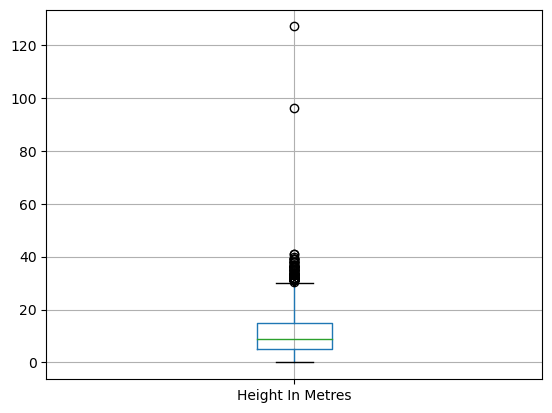

In [57]:
# Use a boxplot to find the outliers
# TODO
import matplotlib.pyplot as plt
trees.boxplot("Height In Metres")
plt.show()

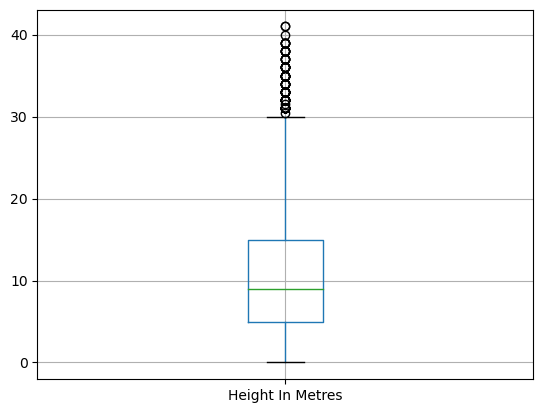

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
1356,00001547,1.0,Beaumont Walk Estate,Housing,Robinia pseudoacacia,2017-05-23,2020/2021,96.0,10.0,63.0,E05000136,Haverstock,527847,184391,-0.157739,51.543941,"(51.543941, -0.157739)"
1863,00013862,1.0,Maitland Park Estate 1,Housing,Prunus avium,2017-05-16,2020/2021,127.0,9.0,34.0,E05000136,Haverstock,527987,184901,-0.155534,51.548497,"(51.548497, -0.155534)"


In [58]:
# Select the crazy outlier rows
# TODO
height_outliers = trees[trees["Height In Metres"] > 80]
below_80 = trees[trees["Height In Metres"] < 80]
below_80.boxplot("Height In Metres")
plt.show()
height_outliers.head()

<hr/>

### 5.2 Outliers for Spread
Now repeat the analysis for spread.
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

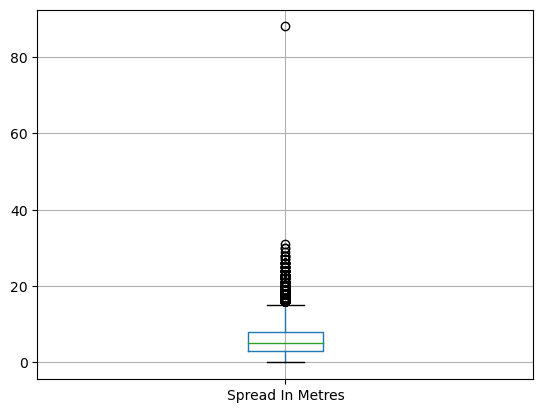

In [59]:
# Use a boxplot to find the outliers
# TODO
trees.boxplot("Spread In Metres")
plt.show()

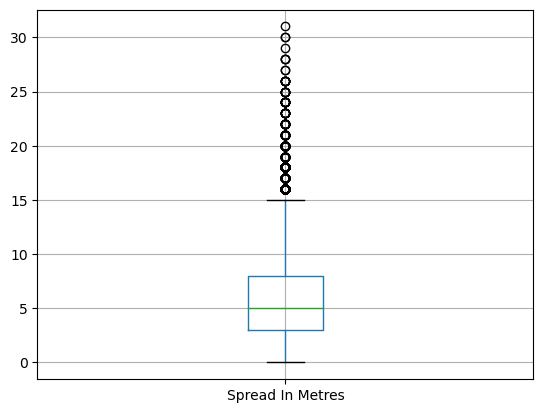

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
18567,00045515,1.0,Broadfield Estate 1,Housing,Quercus robur,2018-04-26,2021/2022,8.0,88.0,17.0,E05000144,Swiss Cottage,525993,184693,-0.184348,51.547074,"(51.547074, -0.184348)"


In [54]:
# Select the crazy outlier rows (if any)
# TODO
spread_outliers = trees[trees["Spread In Metres"] > 40]
below_40 = trees[trees["Spread In Metres"] < 40]
below_40.boxplot("Spread In Metres")
plt.show()
spread_outliers.head()

<hr/>

### 5.3 Outliers for Diameter
Now repeat the analysis for diameter.
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

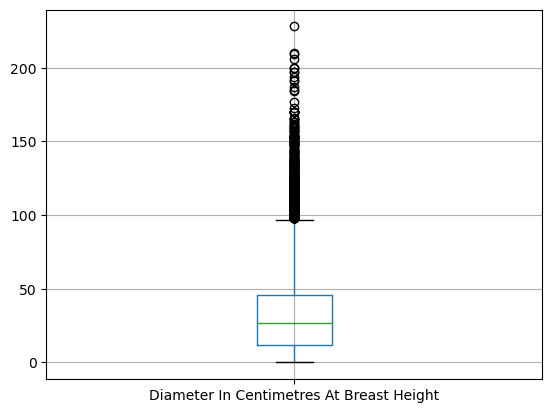

In [55]:
# Use a boxplot to find the outliers
# TODO
trees.boxplot("Diameter In Centimetres At Breast Height")
plt.show()

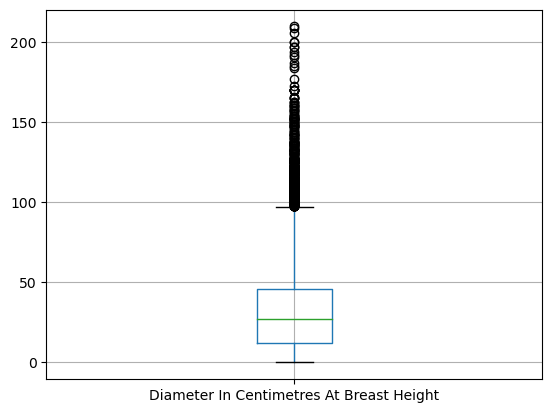

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
1157,00004100,1.0,"LONGFORD STREET, CLARENCE GDNS (LS)",Parks,Platanus x hispanica,2018-03-29,2020/2021,21.0,20.0,228.0,E05000142,Regent's Park,528931,182624,-0.142766,51.527816,"(51.527816, -0.142766)"


In [60]:
# Select the outlier rows (if any)
# TODO
sorted_df = trees[trees["Diameter In Centimetres At Breast Height"] > 220].sort_values(by= 'Diameter In Centimetres At Breast Height', ascending=False)
below_200 = trees[trees["Diameter In Centimetres At Breast Height"] < 220]
below_200.boxplot("Diameter In Centimetres At Breast Height")
plt.show()
sorted_df

<hr/>

### 5.4 Observations

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Write down your observation about outliers in the data.  What assumptions did you make?  Were you comfortable making these assumptions?
    </font></div>


ENTER MARKDOWN HERE

tree height that is more than 60m is the UK is rare and does not make sense. the climate does not allow for trees to grow as tall as 100 or more metres. The spread between the the two outliers form the other recorded measures is too great. 
The outlier in the spread in metres does not make sense. The spread of the outlier tree is 88m however the height is 8m. 
The outliers for the diameter in centimeters are closer together and start to spread when it starts to reach 175cm. there are still many trees with the diameter in the range of 175 - 200cm. After sorting the diameter from highest to lowest. it is a bit clearer that the top three trees do not quite make sense because the height of the trees are less than they typically should be for the diameter to be  as wide as they are.

<hr/>

## Task 6: Identify Duplicates in the Trees Dataset
Sometimes data has duplicate entries.  This is another sign of data quality issues!

### 6.1 Find Duplicate Rows

In our dataset the `Identifier` column should be unique.  Find out if it is!  We've already used a function that can count how many times each value in a column exists.  Use is to see if we have duplicates in the trees Dataframe.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [60]:
# Find out if we have any duplicates
# TODO
trees["Identifier"].duplicated().sum()

6

Now see if you can select the rows from trees DataFrame that are duplicates.  You will need to use the output from the cell above and use it to filter the trees dataframe.

In [61]:
# Select the rows that are duplicated
# TODO
trees[trees.duplicated('Identifier', keep='first')]


,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
6111,00032549,1.0,NARCISSUS ROAD,Highways,Betula albosinensis Fasc.,2018-09-19,2021/2022,9.0,6.0,19.0,E05000145,West Hampstead,525185,185127,-0.195840,51.551159,"(51.551159, -0.19584)"
9186,00022744,1.0,YORK WAY,Highways,Ailanthus altissima,2019-10-30,2022/2023,7.5,3.0,18.0,E05000131,Cantelowes,529983,184724,-0.126837,51.546447,"(51.546447, -0.126837)"
10972,00060088,1.0,FREDERICK STREET,Highways,Vacant Tree Pit (planned: Acer campestre eco s...,2019-11-09,2022/2023,NaN,NaN,NaN,E05000141,King's Cross,530770,182696,-0.116241,51.528046,"(51.528046, -0.116241)"
13098,00000999,1.0,ALMA STREET,Highways,Sorbus hupehensis,2017-07-25,2020/2021,5.0,4.0,18.0,E05000139,Kentish Town,528834,184856,-0.143337,51.547904,"(51.547904, -0.143337)"
13628,00022674,1.0,WOODSOME ROAD,Highways,Sorbus,2017-10-07,2020/2021,7.0,6.0,28.0,E05000137,Highgate,528515,186109,-0.147481,51.559237,"(51.559237, -0.147481)"
15653,00060087,1.0,ARGYLE SQUARE,Highways,Vacant Tree Pit (planned: Acer campestre eco s...,2019-11-09,2022/2023,NaN,NaN,NaN,E05000141,King's Cross,530342,182839,-0.122352,51.529428,"(51.529428, -0.122352)"


<hr/>

### 6.2 Observations

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Write down your observations about duplicates in trees.
    </font></div>


ENTER MARKDOWN HERE

There are a total of 6 duplicates and they are all in the highway contract area. 

<hr/>

## Task 7: Identify Geolocation Issues
The geographic coordinates (Easting and Northing) can be used to plot the trees on a map.  We can use this approach to see if there are any unusual tree locations!

We will make a copy of the original trees dataset and remove any rows that have a missing easting or northing as these can't be plotted on the map.

We can copy the DataFrame using:

- [pandas.DataFrame.copy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html)

We can use the DataFrame filtering technique we saw before to remove the missing values.  E.g. the following code filters out rows where the value for 'mycolumn' is 100:

    mask = df['mycolumn'] != 100
    df = df[mask]

You can also create masks using a function, e.g. this creates a mask which excludes nulls:

    mask = df['mycolumn'].isnull()

We can use this function to plot the trees on a map. Set x to "Easting" and y to "Northing" and set a figsize parameter to (6, 6) to get a square aspect ratio:

- [pandas.DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html)




### 7.1 Remove Trees with Missing Geo-coordinates
Check if there are any rows with null or 0 geo-coordinates.  If there are, remove them as we can't plot these.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [62]:
# Make a copy of the trees
geotrees = trees.copy()
geotrees.shape

(23444, 17)

In [66]:
# Remove null Eastings
# TODO
geotrees = geotrees[geotrees['Easting'].notna()]
geotrees.shape

(23444, 17)

In [67]:
# Remove 0 Eastings.  
# TODO
geotrees = geotrees[geotrees['Easting'] !=0]
geotrees.shape

(23388, 17)

In [68]:
# Remove null Northings
# TODO
geotrees = geotrees[geotrees['Northing'].notna()]
geotrees.shape

(23388, 17)

In [69]:
# Remove 0 Northings.  
# TODO
geotrees = geotrees[geotrees['Northing'] != 0]
geotrees.shape

(23388, 17)

In [70]:
# Confirm how many rows we have
# TODO
geotrees.shape

(23388, 17)

<hr/>

### 7.2 Plot Map of Trees
Now make the plot.  Do a scatter plot of Northing vs Easting. You should obtain an outline of the map of Camden. Compare that outline with a real map of Camden (use good old google maps!). You’ll be able to spot the trees that should not be in that dataset from there!

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cell
    </font></div>

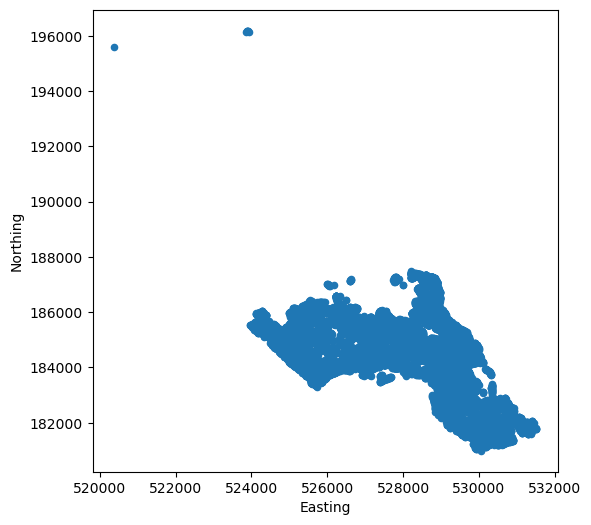

In [71]:
# Plot the trees on a map
# TODO
#lot.scatter(trees['Easting'], trees['Northing'])
#eotrees.plot.scatter('Easting', 'Northing')
#lt.show()
geotrees.plot.scatter(x='Easting', y='Northing', figsize=(6, 6))
plt.show()

### 7.3 Find Trees Outside Camden
From the scatter plot, you should be able to determine how to select the rows from the trees data set containing the offending trees (using the Easting and Northing values)

Select the rows containing trees outside of Camden.  Use the filter technique again.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

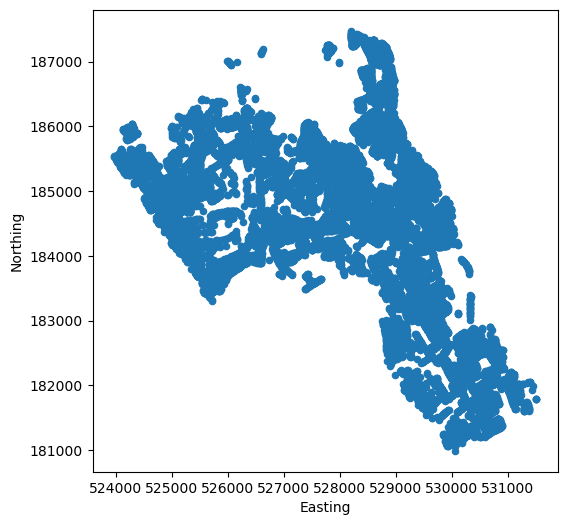

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
78,00044991,1.0,Bells Hill Estate,Housing,Fraxinus excelsior,2017-04-28,2020/2021,20.0,10.0,49.0,NaN,NaN,523883,196179,-0.210713,51.650765,"(51.650765, -0.210713)"
298,00045000,1.0,Estate 167 Furzehill Road,Housing,Pinus sylvestris,2017-04-28,2020/2021,10.0,3.0,41.0,NaN,NaN,520367,195595,-0.261719,51.646283,"(51.646283, -0.261719)"
660,00044992,1.0,Bells Hill Estate,Housing,Crataegus monogyna,2017-04-28,2020/2021,4.0,4.0,7.0,NaN,NaN,523875,196170,-0.210830,51.650690,"(51.65069, -0.21083)"
1526,00044995,1.0,Bells Hill Estate,Housing,Fraxinus excelsior,2017-04-28,2020/2021,18.0,12.0,54.0,NaN,NaN,523936,196127,-0.209969,51.650287,"(51.650287, -0.209969)"
5392,00044990,1.0,Bells Hill Estate,Housing,Aesculus hippocastanum,2017-04-28,2020/2021,22.0,12.0,67.0,NaN,NaN,523889,196188,-0.210618,51.650843,"(51.650843, -0.210618)"
18069,00044993,1.0,Bells Hill Estate,Housing,Tilia cordata,2017-04-28,2020/2021,23.0,14.0,89.0,NaN,NaN,523867,196159,-0.210957,51.650590,"(51.65059, -0.210957)"
18078,00044601,1.0,Bells Hill Estate,Housing,Tilia cordata,2017-04-28,2020/2021,21.0,12.0,56.0,NaN,NaN,523905,196174,-0.210394,51.650719,"(51.650719, -0.210394)"
19532,00044988,1.0,Bells Hill Estate,Housing,Tilia cordata,2017-04-28,2020/2021,21.0,12.0,65.0,NaN,NaN,523909,196169,-0.210340,51.650676,"(51.650676, -0.21034)"


In [72]:
# Select the outlier rows
# TODO
#geotrees[geotrees["Northing"] > 192000]
#non_outlier_trees = trees.loc[(trees["Northing"] < 192000) & (trees["Easting"] > 522000)
#outlier_trees = trees.loc[(trees["Northing"] < 192000)]
#non_outlier_trees.plot.scatter(x='Easting', y='Northing', figsize=(6, 6))
#outlier_trees
# Select the outlier rows and output the data of the outlier trees
# Plot the map again without the outliers
non_outlier_trees = trees.loc[(trees["Northing"] < 192000) & (trees["Easting"] > 522000)]
outlier_trees = trees.loc[(trees["Northing"] > 192000)]
non_outlier_trees.plot.scatter(x= "Easting", y= "Northing", figsize=(6, 6))
plt.show()
outlier_trees

In [74]:
# Confirm how many rows we have
# TODO
non_outlier_trees.shape

(23380, 17)

<hr/>

### 7.4 Observations


<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Write down your observation about geolocation issues.
    </font></div>


ENTER MARKDOWN HERE
some outlier trees were outside of camden and they have been removed from the data
i removed 8 rows from the original rows


<hr/>

## Task 8: Identify Unmatched Data
We have multiple datasets that will need to be joined together to produce the analyses required by the Camden Parks and Open Spaces team.  The data will need to be joined in the following way:

- Use the `Identifier` column in the trees dataset to match to the `Identifier` column in the environmental data set (so we can bring in the environmental data for each tree)
- Use the `Scientific Name` column in the trees dataset to match to the `Scientific Name` column in the common names data set (so we can look up the `Common Name`)

There may be mismatches in the data.  Of particular concern we want to check

- That every tree in the trees dataset has matching environmental data in the environmental data set
- That every environmental row in the environmental dataset has matching tree data in the tree data set
- That every scientific name in the trees dataset has a matching common name in the common names data set

We aren't too concerned about the reverse of the last scenario (if we have extra names in the common names dataset that aren't in the trees data set).  We don't expect Camden to have a specimen of every tree that exists!  

There are a few ways this can be done, but one technique is to use the `isin` function to check if some column in one dataframe contains values that are in another column in another dataframe.  This creates a mask containing rows that match between the two dataframes:

    mask = df1['column_name1'].isin(df2['column_name2'])
    
To select the non-matching rows, we can use Python's bitwise not operator ~:

    mask = ~df1['column_name1'].isin(df2['column_name2'])
    
As we have seen before, the mask can be used to select that subset of rows back from the original dataframe.

### 8.1 Find Trees that Don't have Matching Environmental Data
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [80]:
# Find trees that don't have matching environmental data
# TODO
mask = ~trees['Identifier'].isin(environmental['Identifier'])
trees[mask].shape

(23, 17)

In [82]:
# Confirm how many rows we have
# TODO
trees[trees['Identifier'].isin(environmental['Identifier'])].shape

(23421, 17)

### 8.2 Find Environmental Data that Doesn't have Matching Tree Data
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [86]:
# Find environmental data that doesn't have matching tree data
# TODO
mask2 = ~environmental['Identifier'].isin(trees['Identifier'])
environmental[mask2].shape

(0, 9)

In [84]:
# Confirm how many rows we have
# TODO
environmental[environmental['Identifier'].isin(trees['Identifier'])].shape

(23415, 9)

### 8.3 Find Trees that Don't have Matching Common Names Data
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [88]:
# Find trees with scientific names that don't have matching common names data
# TODO
mask3 = ~trees['Scientific Name'].isin(names['Scientific Name'])
trees[mask3].shape

(76, 17)

In [89]:
# Confirm how many rows we have
# TODO
trees[trees['Scientific Name'].isin(names['Scientific Name'])].shape

(23368, 17)

<hr/>

### 8.4 Observations

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Write down your observation about unmatched data issues.
    </font></div>


ENTER MARKDOWN HERE
there are 23 trees that do not have matching enviromental data. however all enviromental data have matching trees. there 0 unmached data in the envirometal data set. There are 76, trees with scientific names but do not have common names.

<hr/>

# END OF NOTEBOOK